# Analyse des Actifs Financiers
Ce notebook analyse les donn√©es historiques du Bitcoin, de l'Or et du S&P 500.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import os



## Import des donn√©es
Chargement des donn√©es depuis les fichiers CSV.

In [50]:
# Remplacez 'votre_fichier.csv' par le chemin r√©el de votre fichier CSV.
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
#df_btc.set_index('Date', inplace=True)
#df_sp500.set_index('Date', inplace=True)
#df_gold.set_index('Date', inplace=True)


## Information detailler 

In [51]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
                      Date          Close           High            Low  \
count                 1828    1828.000000    1828.000000    1828.000000   
mean   2022-08-13 12:00:00   38432.723787   39228.154763   37516.246741   
min    2020-02-12 00:00:00    4970.788086    5331.833984    4106.980957   
25%    2021-05-13 18:00:00   20588.993652   20992.409668   20155.566406   
50%    2022-08-13 12:00:00   34632.855469   35352.632812   33484.929688   
75%    2023-11-13 06:00:00   54817.337891   56647.227539   53351.402344   
max    2025-02-12 00:00:00  106146.265625  109114.882812  105291.734375   
std                    NaN   22747.948801   23210.682924   22219.168295   

                Open        Volume  
count    1828.000000  1.828000e+03  
mean    38388.186494  3.372781e+10  
min      5002.578125  5.331173e+09  
25%     20568.209961  2.064499e+10  
50%     34569.574219  3.020514e+10  
75%     54753.849609  4.104857e+10  
max    106147.296875  3.5096

In [52]:
df_btc.head()

Date         Close          High           Low          Open  \
0 2020-02-12  10326.054688  10393.611328  10202.387695  10202.387695   
1 2020-02-13  10214.379883  10457.626953  10116.161133  10323.960938   
2 2020-02-14  10312.116211  10321.996094  10125.534180  10211.550781   
3 2020-02-15   9889.424805  10341.555664   9874.427734  10313.856445   
4 2020-02-16   9934.433594  10053.968750   9722.386719   9889.179688   

        Volume  
0  43444303830  
1  49356071373  
2  43338264162  
3  43865054831  
4  43374780305

In [53]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1828 non-null   datetime64[ns]
 1   Close   1828 non-null   float64       
 2   High    1828 non-null   float64       
 3   Low     1828 non-null   float64       
 4   Open    1828 non-null   float64       
 5   Volume  1828 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 85.8 KB


## Statistiques Descriptives
Calcul et affichage des statistiques cl√©s pour chaque actif.

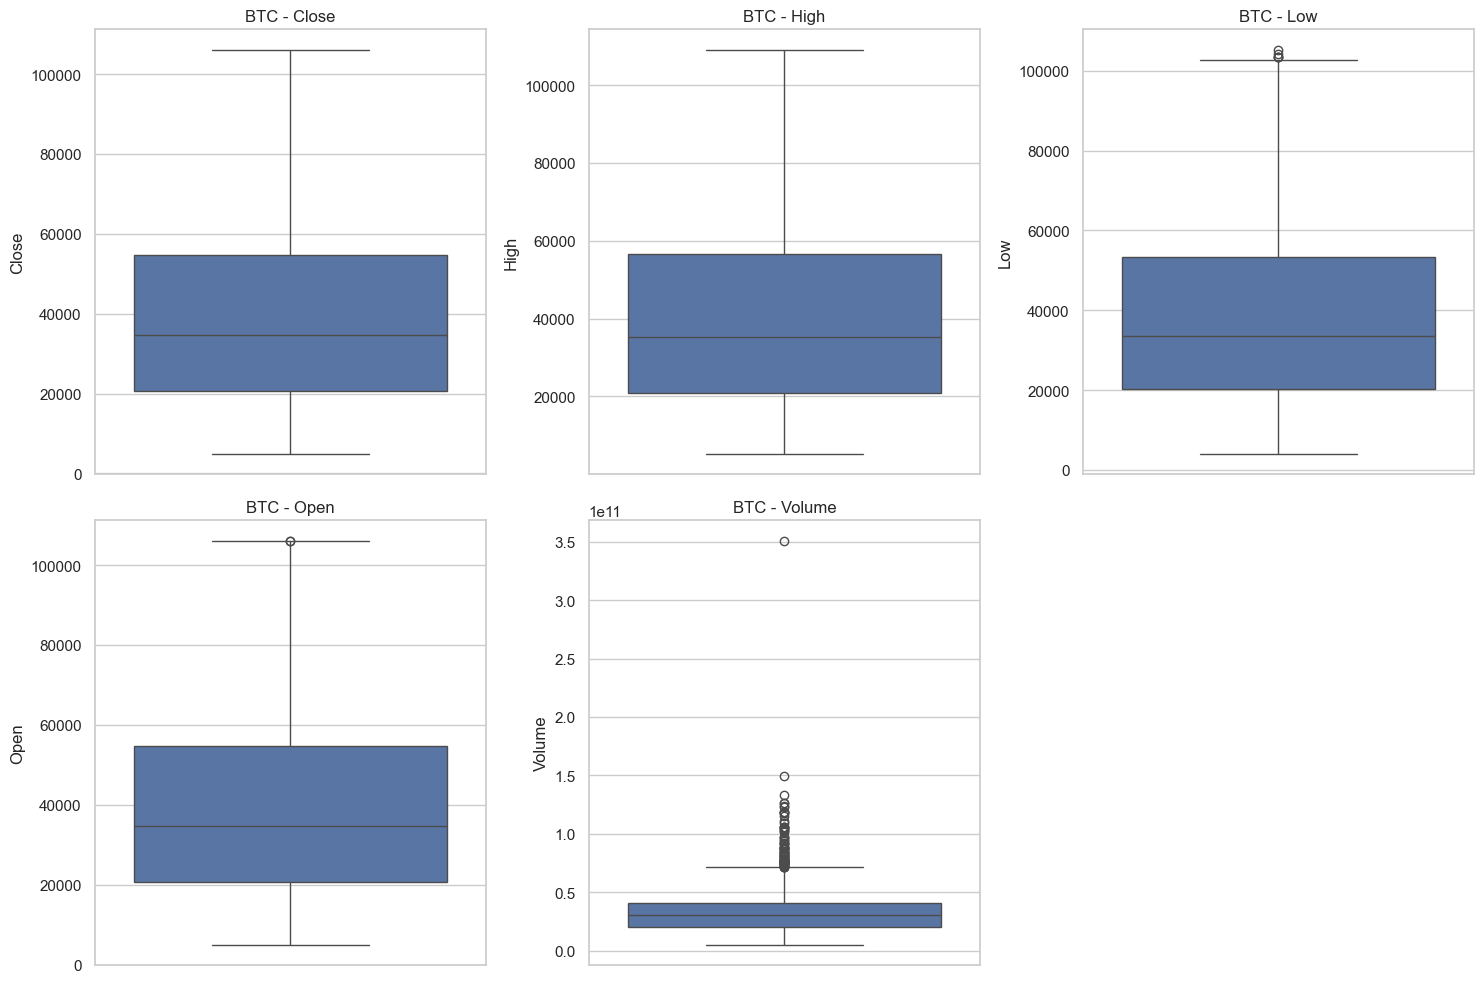

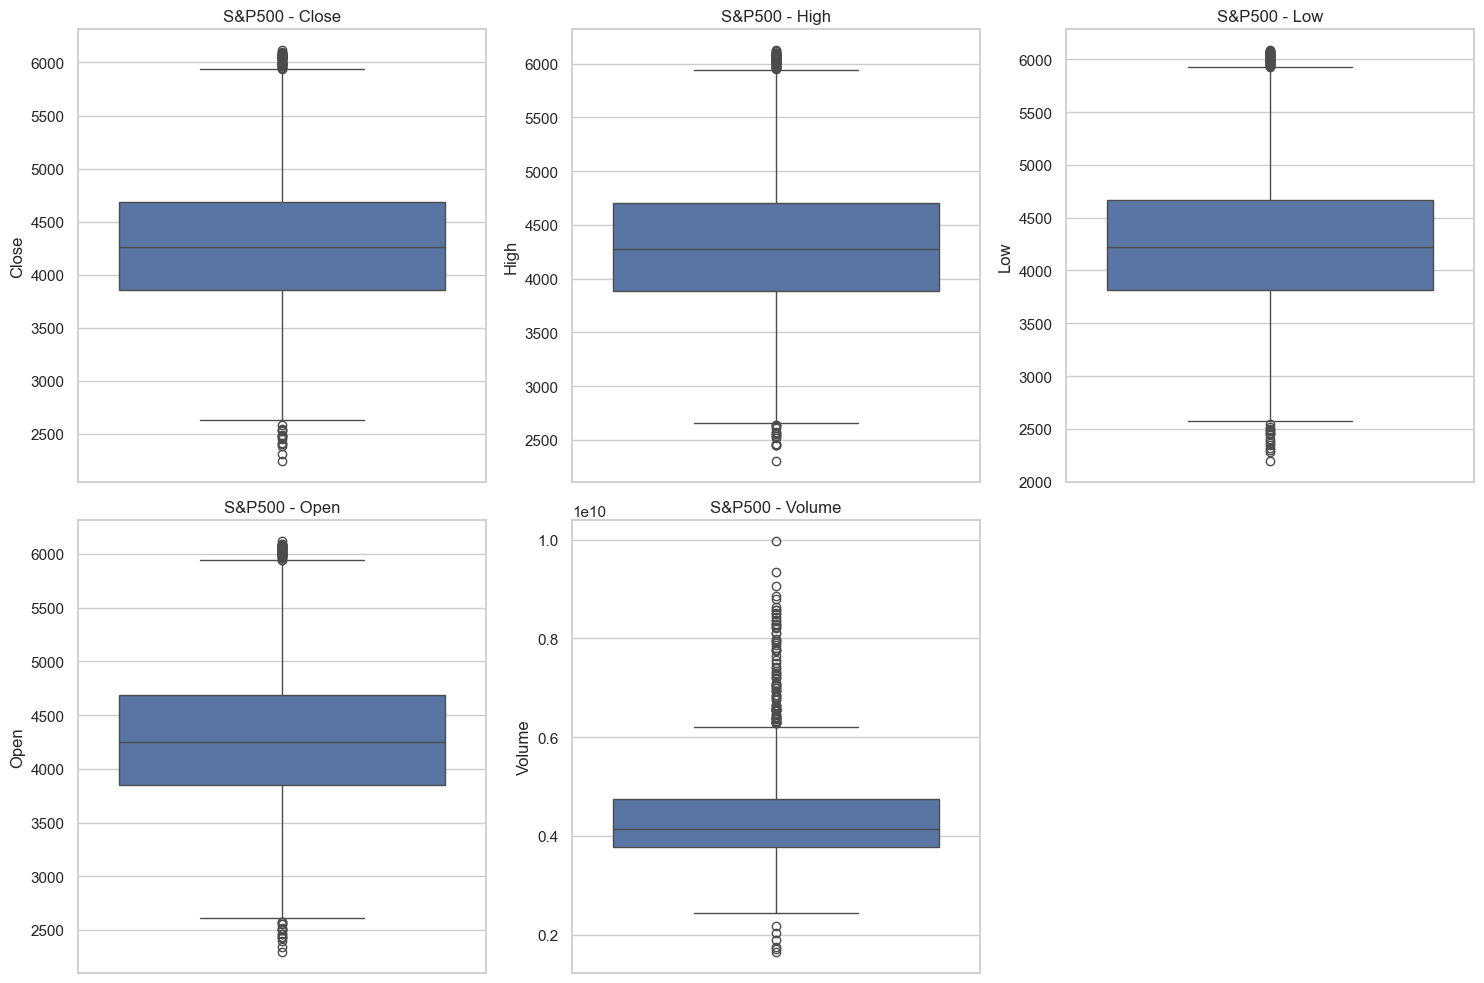

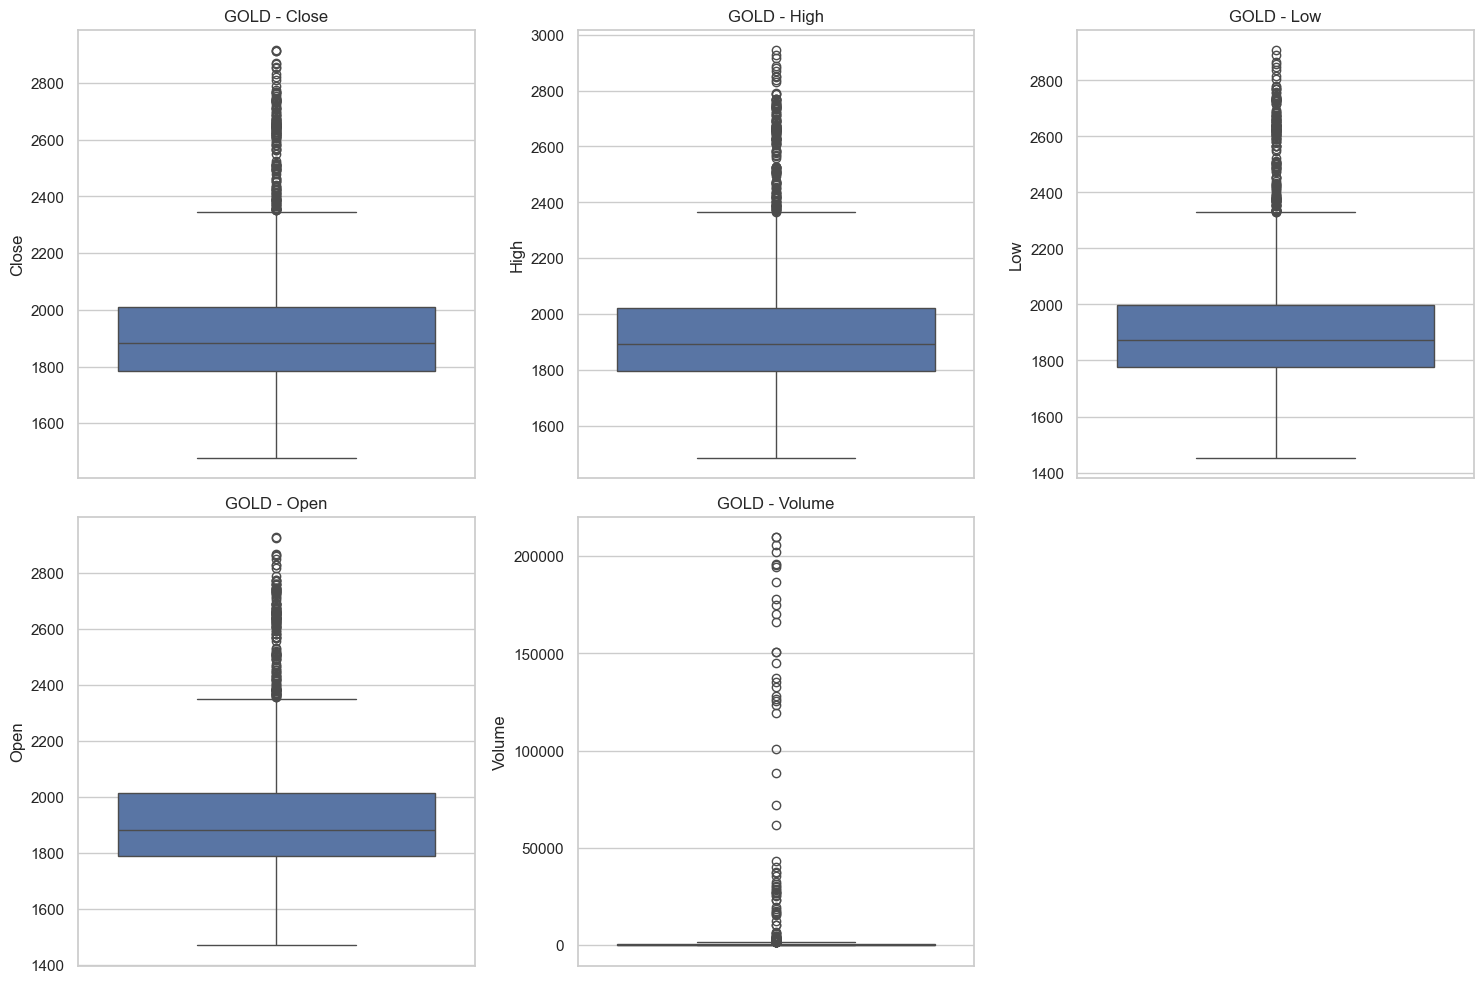

In [54]:
def plot_boxplots(df, asset_name):
    # S√©lectionner les colonnes num√©riques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # D√©finir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'it√©ration
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour √©viter les erreurs
        data = df[col].dropna()
        # V√©rifier que la s√©rie n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide apr√®s suppression des NaN. Box plot ignor√©.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut √™tre peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer √† la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilis√©s, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames d√©j√† charg√©s et index√©s sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [55]:
df_btc.head()


Date         Close          High           Low          Open  \
0 2020-02-12  10326.054688  10393.611328  10202.387695  10202.387695   
1 2020-02-13  10214.379883  10457.626953  10116.161133  10323.960938   
2 2020-02-14  10312.116211  10321.996094  10125.534180  10211.550781   
3 2020-02-15   9889.424805  10341.555664   9874.427734  10313.856445   
4 2020-02-16   9934.433594  10053.968750   9722.386719   9889.179688   

        Volume  
0  43444303830  
1  49356071373  
2  43338264162  
3  43865054831  
4  43374780305

## Matrice de Corr√©lation
Cr√©ation d'une matrice de corr√©lation pour comprendre les relations entre les diff√©rents actifs.
Cette visualisation utilise une heatmap pour montrer les corr√©lations de -1 √† 1.

In [56]:
import matplotlib.pyplot as plt

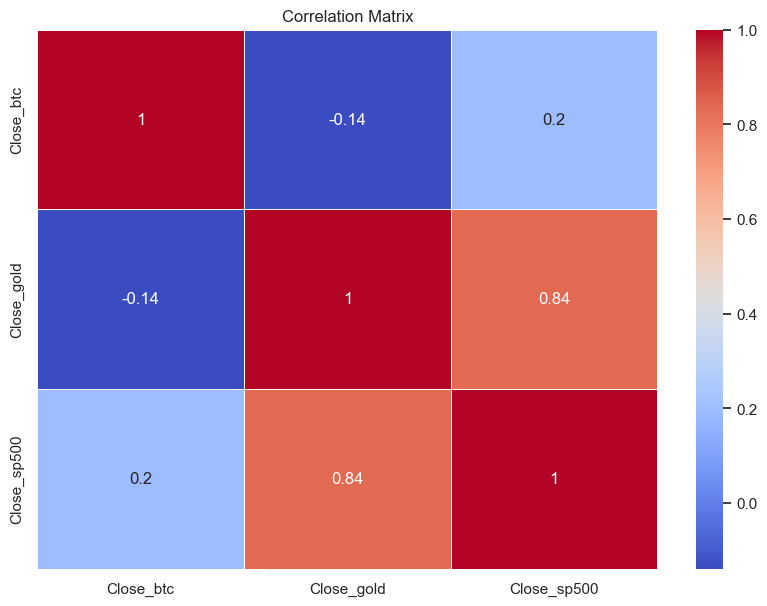

In [57]:
# Data Visualization and Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a combined dataframe for analysis
combined_data = pd.DataFrame({
    'Date': df_btc.index,
    'Close_btc': df_btc['Close'],
    'Close_gold': df_gold['Close'],
    'Close_sp500': df_sp500['Close']
})



# Display the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [58]:
combined_data.corr()

Date  Close_btc  Close_gold  Close_sp500
Date         1.000000   0.638317    0.764507     0.849318
Close_btc    0.638317   1.000000   -0.138449     0.196067
Close_gold   0.764507  -0.138449    1.000000     0.838961
Close_sp500  0.849318   0.196067    0.838961     1.000000

In [59]:
# ‚úÖ V√©rification de la colonne de prix dans chaque dataset
def check_price_column(df, asset_name):
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }

    if asset_name in price_columns:
        price_col = price_columns[asset_name]
    else:
        print(f"‚ö†Ô∏è Erreur : {asset_name} n'est pas reconnu dans la liste des actifs.")
        return None, df  

    if price_col not in df.columns:
        print(f"‚ùå Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("üõ† Voici les colonnes disponibles :", df.columns)
        return None, df  

    print(f"‚úÖ La colonne '{price_col}' est bien trouv√©e pour {asset_name}.")
    return price_col, df  

# ‚úÖ Calcul des rendements, volatilit√© et Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    df["Date"] = pd.to_datetime(df["Date"])  
    df = df.sort_values("Date")  
    df = df.set_index("Date")  

    price_col, df = check_price_column(df, asset_name)
    if price_col is None:  
        return df  

    # üìà Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # üìä Volatilit√© (√©cart-type des rendements)
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # üî• Ratio de Sharpe (en supposant un taux sans risque de 2% par an)
    sharpe_ratio = (df["Daily Return"].mean() * 252 - risk_free_rate) / (daily_volatility * np.sqrt(252))

    # üéØ Affichage des r√©sultats
    print(f"\nüìä Statistiques pour {asset_name}:")
    print(f"‚úÖ Rendement Quotidien Moyen: {df['Daily Return'].mean():.4%}")
    print(f"‚úÖ Rendement Mensuel Moyen: {df['Monthly Return'].mean():.4%}")
    print(f"‚úÖ Rendement Annuel Moyen: {df['Annual Return'].mean():.4%}")
    print(f"üìâ Volatilit√© Quotidienne: {daily_volatility:.4%}")
    print(f"üìâ Volatilit√© Mensuelle: {monthly_volatility:.4%}")
    print(f"üìâ Volatilit√© Annuelle: {annual_volatility:.4%}")
    print(f"‚öñÔ∏è Ratio de Sharpe: {sharpe_ratio:.2f}")

    return df

In [60]:
print(f"üìå Colonnes disponibles dans {asset_name} :", df.columns)


NameError: name 'asset_name' is not defined

In [ ]:
print(df.dtypes)  # V√©rifie si "Date" est bien un objet (string) ou datetime


Gold_Close        float64
Gold_High         float64
Gold_Low          float64
Gold_Open         float64
Volume              int64
Daily Return      float64
Monthly Return    float64
Annual Return     float64
dtype: object


In [ ]:
print(df.index)  # V√©rifie si la colonne Date est d√©j√† l'index
df = df.reset_index()  # Remet tout √† plat


DatetimeIndex(['2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26',
               ...
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12'],
              dtype='datetime64[ns]', name='Date', length=1260, freq=None)


In [ ]:


# D√©finir les chemins des fichiers
btc_file_path = '../CSV/df_btc.csv'
gold_file_path = '../CSV/df_gold.csv'
sp500_file_path = '../CSV/df_sp500.csv'

# V√©rifier si les fichiers existent
if os.path.exists(btc_file_path) and os.path.exists(gold_file_path) and os.path.exists(sp500_file_path):
    # Charger les donn√©es
    df_btc = pd.read_csv(btc_file_path, parse_dates=['Date'])
    df_gold = pd.read_csv(gold_file_path, parse_dates=['Date'])
    df_sp500 = pd.read_csv(sp500_file_path, parse_dates=['Date'])
else:
    print("Un ou plusieurs fichiers n'existent pas. Veuillez v√©rifier les chemins des fichiers.")
    # Arr√™ter l'ex√©cution du script si les fichiers ne sont pas trouv√©s
    raise FileNotFoundError("Un ou plusieurs fichiers n'existent pas. Veuillez v√©rifier les chemins des fichiers.")

# ‚úÖ V√©rification et renommage des colonnes
df_btc.rename(columns={"Close": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ‚úÖ V√©rification de la colonne Date
for df, asset in zip([df_btc, df_sp500, df_gold], ["BTC", "SP500", "GOLD"]):
    if "Date" not in df.columns:
        print(f"‚ùå Erreur : La colonne 'Date' est absente dans {asset} !")
    else:
        df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date au bon format
        df.sort_values("Date", inplace=True)  # Trier les donn√©es
        df.set_index("Date", inplace=True)  # D√©finir Date comme index

# ‚úÖ Fonction pour calculer les rendements, la volatilit√© et le Sharpe Ratio
def compute_returns(df, asset_name, risk_free_rate=0.02):
    # V√©rifier et r√©cup√©rer la colonne de prix
    price_columns = {
        "BTC": "BTC_Close",
        "SP500": "SP500_Close",
        "GOLD": "Gold_Close"
    }
    
    if asset_name not in price_columns:
        print(f"‚ö†Ô∏è Erreur : {asset_name} n'est pas reconnu.")
        return df
    
    price_col = price_columns[asset_name]

    if price_col not in df.columns:
        print(f"‚ùå Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("üõ† Colonnes disponibles :", df.columns)
        return df  

    # ‚úÖ Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # ‚úÖ Calcul de la volatilit√©
    daily_volatility = df["Daily Return"].std()
    monthly_volatility = df["Monthly Return"].std()
    annual_volatility = df["Annual Return"].std()

    # ‚úÖ Calcul du Sharpe Ratio
    sharpe_ratio = (df["Annual Return"].mean() - risk_free_rate) / annual_volatility if annual_volatility > 0 else np.nan

    # üìä ‚úÖ Affichage des r√©sultats
    print(f"\nüìä **R√©sultats pour {asset_name}** :")
    print(f"‚úÖ Rendement quotidien moyen : {df['Daily Return'].mean():.4%}")
    print(f"‚úÖ Rendement mensuel moyen : {df['Monthly Return'].mean():.4%}")
    print(f"‚úÖ Rendement annuel moyen : {df['Annual Return'].mean():.4%}")

    print(f"\nüìà **Volatilit√© :**")
    print(f"üìå Quotidienne : {daily_volatility:.4%}")
    print(f"üìå Mensuelle : {monthly_volatility:.4%}")
    print(f"üìå Annuelle : {annual_volatility:.4%}")

    print(f"\nüìâ **Ratio de Sharpe :** {sharpe_ratio:.4f}")

    return df

# ‚úÖ Ex√©cuter la fonction pour chaque actif
df_btc = compute_returns(df_btc, "BTC")
df_sp500 = compute_returns(df_sp500, "SP500")
df_gold = compute_returns(df_gold, "GOLD")


üìä **R√©sultats pour BTC** :
‚úÖ Rendement quotidien moyen : 0.1793%
‚úÖ Rendement mensuel moyen : 6.1212%
‚úÖ Rendement annuel moyen : 67.9687%

üìà **Volatilit√© :**
üìå Quotidienne : 3.3455%
üìå Mensuelle : 19.7664%
üìå Annuelle : 96.6439%

üìâ **Ratio de Sharpe :** 0.6826

üìä **R√©sultats pour SP500** :
‚úÖ Rendement quotidien moyen : 0.0557%
‚úÖ Rendement mensuel moyen : 1.3486%
‚úÖ Rendement annuel moyen : 25.1009%

üìà **Volatilit√© :**
üìå Quotidienne : 1.3455%
üìå Mensuelle : 5.3521%
üìå Annuelle : 2.5341%

üìâ **Ratio de Sharpe :** 9.1161

üìä **R√©sultats pour GOLD** :
‚úÖ Rendement quotidien moyen : 0.0546%
‚úÖ Rendement mensuel moyen : 1.2495%
‚úÖ Rendement annuel moyen : 12.0087%

üìà **Volatilit√© :**
üìå Quotidienne : 1.0274%
üìå Mensuelle : 4.1290%
üìå Annuelle : 21.8834%

üìâ **Ratio de Sharpe :** 0.4574


C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\2860072797.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\2860072797.py:54: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\2860072797.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35984\2860072797.py:54: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipyk

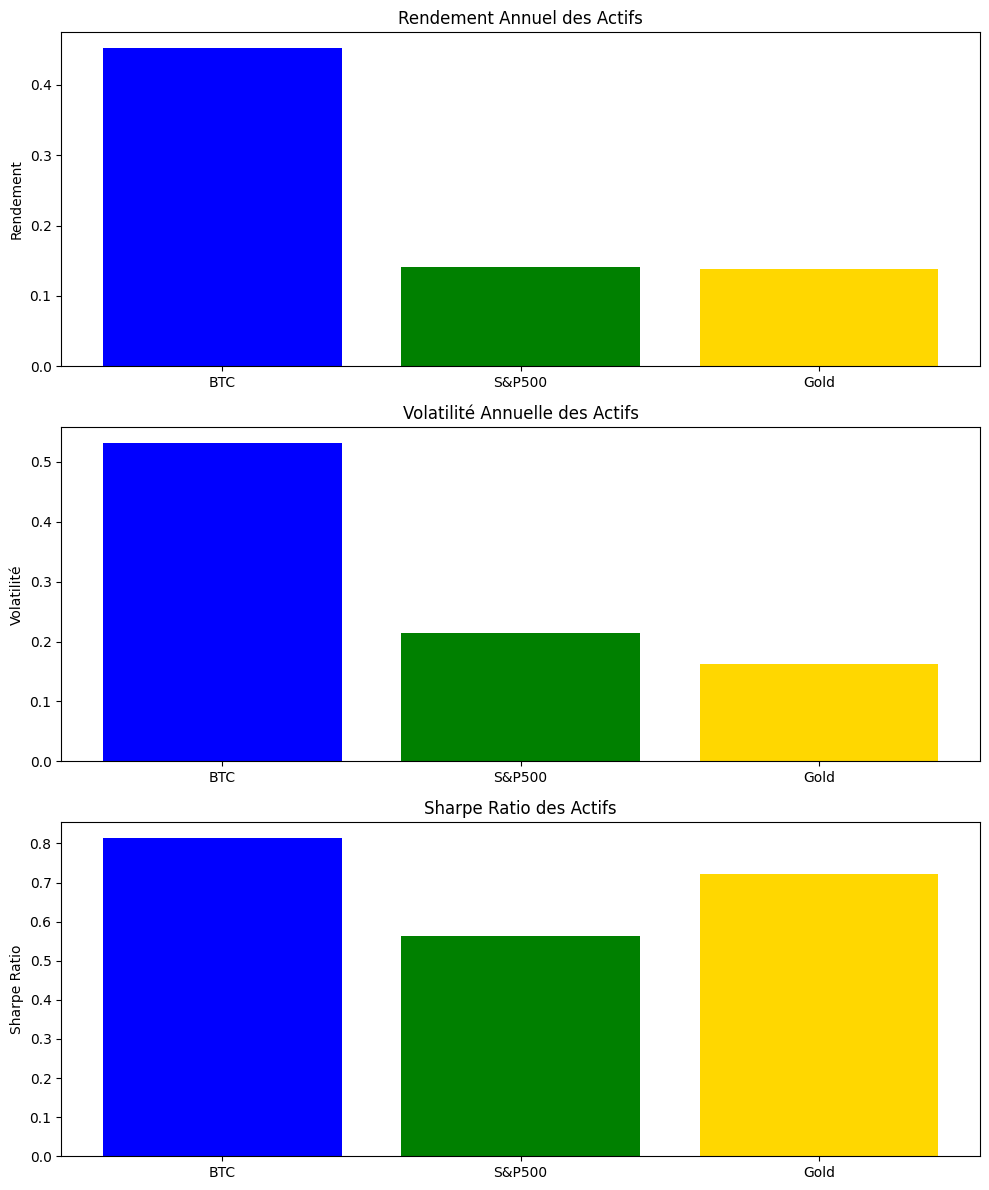

In [ ]:
# Charger les donn√©es (exemple, remplacez par vos fichiers)
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'])

# Mettre la date en index
df_btc.set_index('Date', inplace=True)
df_sp500.set_index('Date', inplace=True)
df_gold.set_index('Date', inplace=True)

# Calcul du rendement journalier
df_btc['Returns'] = df_btc['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()

# Calcul du rendement moyen et de la volatilit√© annuelle
annual_return = {
    'BTC': df_btc['Returns'].mean() * 252,
    'S&P500': df_sp500['Returns'].mean() * 252,
    'Gold': df_gold['Returns'].mean() * 252
}

annual_volatility = {
    'BTC': df_btc['Returns'].std() * np.sqrt(252),
    'S&P500': df_sp500['Returns'].std() * np.sqrt(252),
    'Gold': df_gold['Returns'].std() * np.sqrt(252)
}

# Supposons un taux sans risque de 2%
risk_free_rate = 0.02

sharpe_ratios = {asset: (annual_return[asset] - risk_free_rate) / annual_volatility[asset] 
                 for asset in annual_return}

# Cr√©ation des graphiques
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Rendement annuel
axes[0].bar(annual_return.keys(), annual_return.values(), color=['blue', 'green', 'gold'])
axes[0].set_title('Rendement Annuel des Actifs')
axes[0].set_ylabel('Rendement')

# Volatilit√© annuelle
axes[1].bar(annual_volatility.keys(), annual_volatility.values(), color=['blue', 'green', 'gold'])
axes[1].set_title('Volatilit√© Annuelle des Actifs')
axes[1].set_ylabel('Volatilit√©')

# Sharpe Ratio
axes[2].bar(sharpe_ratios.keys(), sharpe_ratios.values(), color=['blue', 'green', 'gold'])
axes[2].set_title('Sharpe Ratio des Actifs')
axes[2].set_ylabel('Sharpe Ratio')

plt.tight_layout()
plt.show()

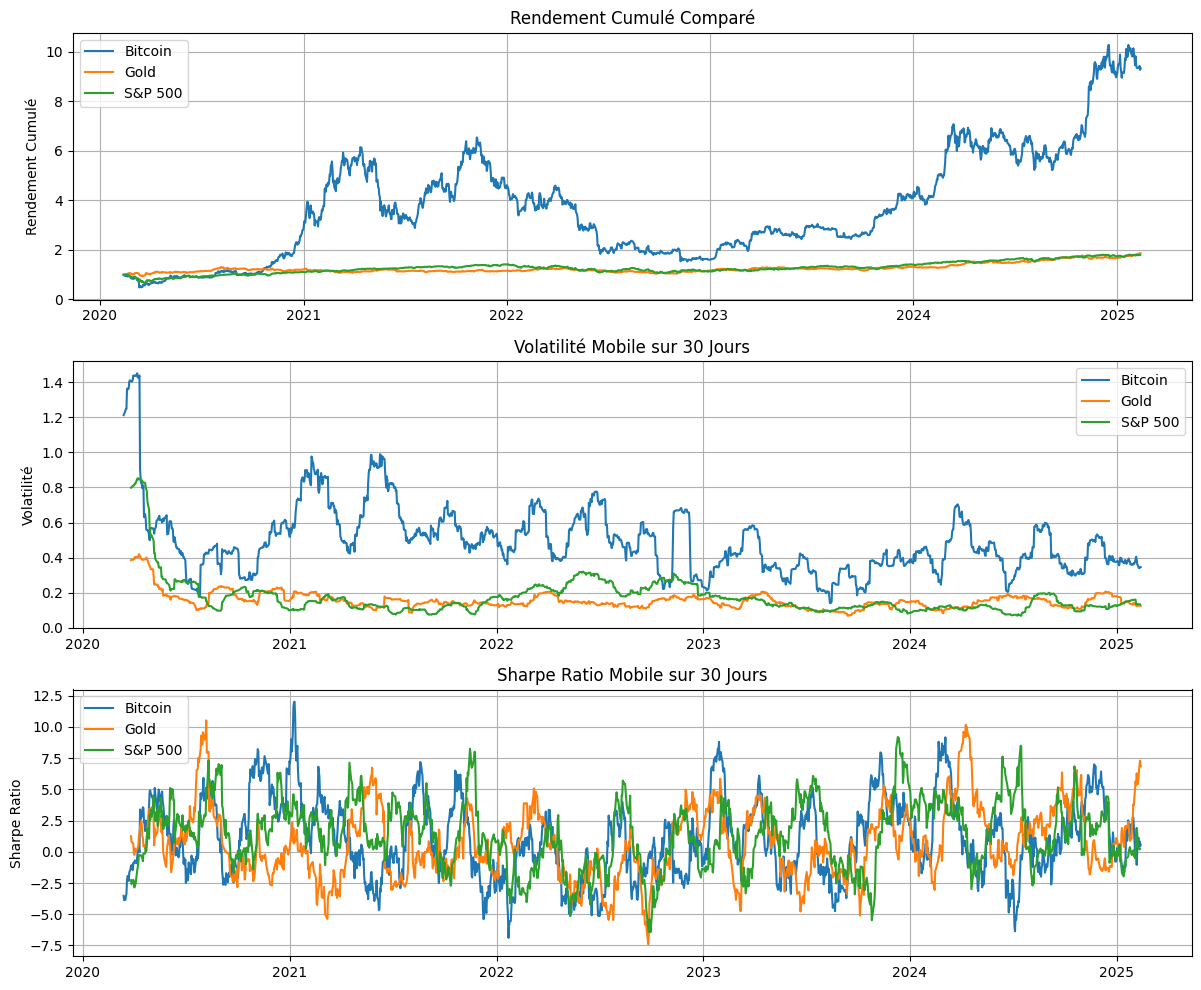

In [ ]:
# Charger les donn√©es
df_btc = pd.read_csv('../CSV/df_btc.csv', parse_dates=['Date'], index_col='Date')
df_gold = pd.read_csv('../CSV/df_gold.csv', parse_dates=['Date'], index_col='Date')
df_sp500 = pd.read_csv('../CSV/df_sp500.csv', parse_dates=['Date'], index_col='Date')

# Calcul des rendements quotidiens
df_btc['Returns'] = df_btc['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()

# Param√®tres
risk_free_rate = 0.02  # Taux sans risque (2%)
trading_days = 252  # Nombre de jours de trading par an

# Calcul des statistiques
assets = {'Bitcoin': df_btc, 'Gold': df_gold, 'S&P 500': df_sp500}

# Tracer les graphiques de rendement, volatilit√© et Sharpe Ratio
grid_size = (3, 1)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

for i, (asset, df) in enumerate(assets.items()):
    df['Cumulative Returns'] = (1 + df['Returns']).cumprod()
    df['Rolling Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(trading_days)
    rolling_sharpe = (df['Returns'].rolling(window=30).mean() * trading_days - risk_free_rate) / df['Rolling Volatility']
    
    axes[0].plot(df.index, df['Cumulative Returns'], label=asset)
    axes[1].plot(df.index, df['Rolling Volatility'], label=asset)
    axes[2].plot(df.index, rolling_sharpe, label=asset)

# Configurer les graphiques
axes[0].set_title('Rendement Cumul√© Compar√©')
axes[0].set_ylabel('Rendement Cumul√©')
axes[0].legend()
axes[0].grid()

axes[1].set_title('Volatilit√© Mobile sur 30 Jours')
axes[1].set_ylabel('Volatilit√©')
axes[1].legend()
axes[1].grid()

axes[2].set_title('Sharpe Ratio Mobile sur 30 Jours')
axes[2].set_ylabel('Sharpe Ratio')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()


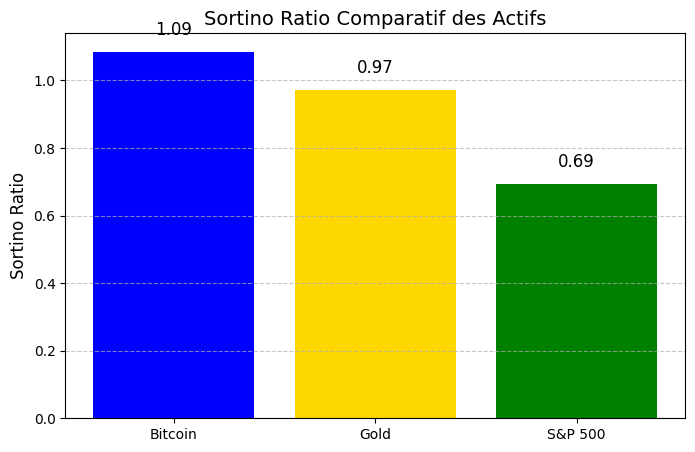

In [ ]:


# Charger les donn√©es
df_btc = pd.read_csv(btc_file_path, parse_dates=['Date'], index_col='Date')
df_gold = pd.read_csv(gold_file_path, parse_dates=['Date'], index_col='Date')
df_sp500 = pd.read_csv(sp500_file_path, parse_dates=['Date'], index_col='Date')

# Calcul des rendements quotidiens
df_btc['Returns'] = df_btc['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()

# Param√®tres
risk_free_rate = 0.02  # Taux sans risque (2%)
trading_days = 252  # Nombre de jours de trading par an

# Fonction pour calculer le Sortino Ratio
def sortino_ratio(returns, risk_free_rate):
    mean_return = returns.mean() * trading_days
    downside_deviation = returns[returns < 0].std() * np.sqrt(trading_days)
    return (mean_return - risk_free_rate) / downside_deviation

# Calcul du Sortino Ratio pour chaque actif
sortino_ratios = {
    'Bitcoin': sortino_ratio(df_btc['Returns'], risk_free_rate),
    'Gold': sortino_ratio(df_gold['Returns'], risk_free_rate),
    'S&P 500': sortino_ratio(df_sp500['Returns'], risk_free_rate)
}

# Affichage sous forme de barres
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(sortino_ratios.keys(), sortino_ratios.values(), color=['blue', 'gold', 'green'])

# Configuration du graphique
ax.set_title('Sortino Ratio Comparatif des Actifs', fontsize=14)
ax.set_ylabel('Sortino Ratio', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher les valeurs sur les barres
for i, v in enumerate(sortino_ratios.values()):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=12)

plt.show()



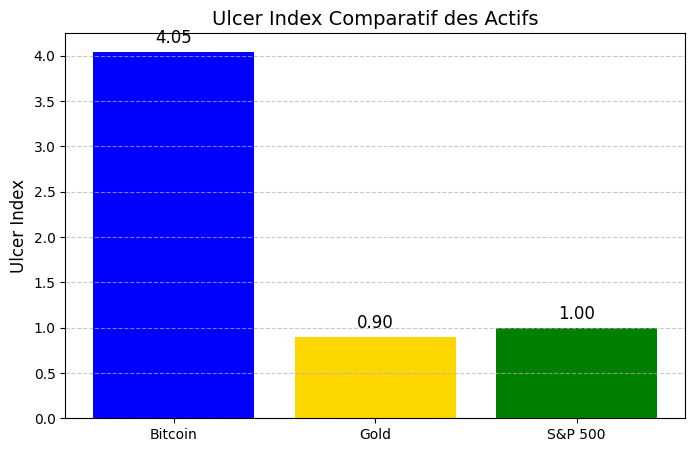

In [ ]:
# Charger les donn√©es
df_btc = pd.read_csv(btc_file_path, parse_dates=['Date'], index_col='Date')
df_gold = pd.read_csv(gold_file_path, parse_dates=['Date'], index_col='Date')
df_sp500 = pd.read_csv(sp500_file_path, parse_dates=['Date'], index_col='Date')

# Calcul des rendements quotidiens
df_btc['Returns'] = df_btc['Close'].pct_change()
df_gold['Returns'] = df_gold['Close'].pct_change()
df_sp500['Returns'] = df_sp500['Close'].pct_change()

# Fonction pour calculer l'Ulcer Index
def ulcer_index(returns):
    cumulative_returns = (1 + returns).cumprod()
    max_cumulative_returns = cumulative_returns.cummax()
    drawdown = (cumulative_returns - max_cumulative_returns) / max_cumulative_returns
    ulcer_index = np.sqrt((drawdown**2).mean() * 100)
    return ulcer_index

# Calcul de l'Ulcer Index pour chaque actif
ulcer_indices = {
    'Bitcoin': ulcer_index(df_btc['Returns']),
    'Gold': ulcer_index(df_gold['Returns']),
    'S&P 500': ulcer_index(df_sp500['Returns'])
}

# Affichage sous forme de barres
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ulcer_indices.keys(), ulcer_indices.values(), color=['blue', 'gold', 'green'])

# Configuration du graphique
ax.set_title('Ulcer Index Comparatif des Actifs', fontsize=14)
ax.set_ylabel('Ulcer Index', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher les valeurs sur les barres
for i, v in enumerate(ulcer_indices.values()):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontsize=12)

plt.show()
